In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("1956_Full_data", sep=",")

In [3]:
df["Chart_Year"] = 1973

In [4]:
df = df.drop("Unnamed: 0", axis = 1)

In [5]:
df.head()

,Rank,Year,Artist,Song1,Chart_Year
0,1,1956,The Five Satins,In The Still Of The Nite,1973
1,2,1954,The Penguins,Hey Senorita,1973
2,3,1961,Elvis Presley,Can't Help Falling In Love,1973
3,4,1965,The Righteous Brothers,Hung On You,1973
4,5,1957,Mello-Kings,"Tonite, Tonite",1973


In [6]:
songs = pd.read_csv("songsWithPopularity.csv",sep=",")
songs = songs[songs["Spotify_Popularity"] > -1]

In [7]:
def calculateCP(M, y):
    K = np.exp(4.57)
    CP = (pow(M, -1*0.1)* np.exp(-0.01*y) * K)
    return CP

In [11]:
def genchart(df,songs):
    df.columns = ['Rank','Year',
                     'Artist','Title', 'Chart_Year']
    mergedStuff = pd.merge(songs, df, on=['Title','Artist'], how='outer')
    mergedStuff = mergedStuff.dropna()
    x2 = mergedStuff.apply(lambda x: x['Chart_Year'] - x['year'], axis = 1)
    y = mergedStuff['Spotify_Popularity']
    new_df = pd.DataFrame({"Year": x2.values, 
                   "Spotify_Popularity": y.values, 
                   "Original_Year": mergedStuff['year'].values, 
                   "Spotify_Rank": mergedStuff["Rank_x"].values,
                   "WCBS_Rank": mergedStuff['Rank_y'].values,
                   "WCBS_Chart_Year": mergedStuff['Chart_Year'].values,
                   "Title": mergedStuff["Title"].values, 
                   "Artist": mergedStuff["Artist"].values})
    new_df["Predicted_Popularity"] = new_df.apply(lambda x: calculateCP(float(x["Spotify_Rank"]), x["Year"]), axis=1)
    new_df = new_df.sort_values('WCBS_Rank')
    plt.scatter('WCBS_Rank', 'Predicted_Popularity',data = new_df)
    #plt.plot('WCBS_Rank', 'Spotify_Popularity',data = new_df)
    plt.legend(loc='best')
    plt.rcParams['figure.figsize'] = 10, 6
    plt.rcParams['font.size'] = 12
    plt.xlabel('WCBS Rank')
    plt.ylabel('Spotify Popularity')
    plt.title('Predicted popularity 1973')
    

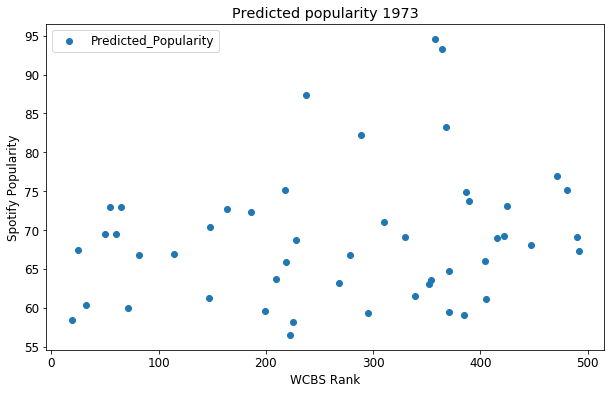

In [12]:
genchart(df,songs)